<a href="https://colab.research.google.com/github/Janani-selvakumaravelan/digit-recognizer-cnn/blob/main/CNN_DigitScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.7941 - loss: 0.6543 - val_accuracy: 0.9782 - val_loss: 0.0693
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - accuracy: 0.9676 - loss: 0.1095 - val_accuracy: 0.9857 - val_loss: 0.0443
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9787 - loss: 0.0738 - val_accuracy: 0.9874 - val_loss: 0.0370
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.9820 - loss: 0.0609 - val_accuracy: 0.9898 - val_loss: 0.0327
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9850 - loss: 0.0515 - val_accuracy: 0.9894 - val_loss: 0.0315
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0381
Test Accuracy: 98.94%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


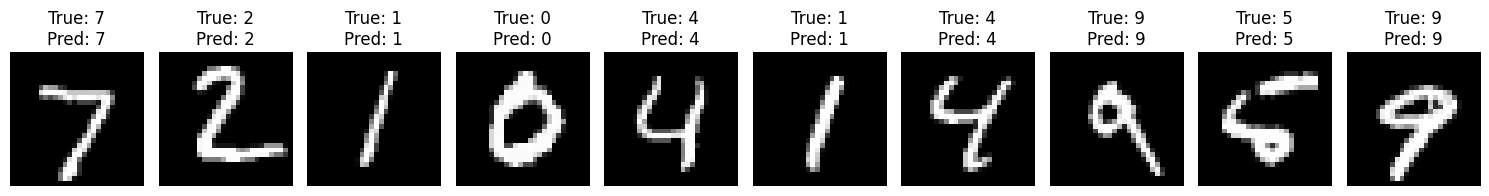

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data preprocessing
# Reshape data to fit CNN input
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Visualize predictions
def plot_predictions(model, X_test, y_test, num=10):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(15,5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(X_test[i].reshape(28,28), cmap='gray')
        plt.title(f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(y_pred[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(model, X_test, y_test)
